# Permutations

This notebook demonstrates the effect of changing different settings.

In [ ]:
image_model
- vqgan - ...

perceptor
- ...
- ...

reencode each frame

##############

# image_model fixed

animation
preanimation
camera lock

cutouts

cutpow

stabilization modes

border mode

sampling mode

infill mode

#############################

palettes

palette size

smoothing

gamma

hdr weight

palette normalization

lock palette

target palette

+/- stabilization weights, modes, etc.

#############################




In [ ]:
%%capture
%matplotlib inline

# animations for limited palette widget
# - https://pytti-tools.github.io/pytti-book/widget_understanding_limited_palette.html#widget

from pittybook_utils import (
    ExperimentMatrix
)

exp_limited_palette = ExperimentMatrix(
    variant = dict(
        palettes=(10,30,70),
        palette_size=(3,7,15),
        #cutouts=(10,50,100),
        #cut_pow=(0.5,1,1.5,2),
        gamma=(0, 0.1, 1),
        hdr_weight=(0, 0.1, 1),
        smoothing_weight=(0, 0.1, 1),
        #lock_palette=(True,False),
        palette_normalization_weight=(0, 0.1, 1),
    ),
    invariant = dict(
        lock_palette=False,
        cutouts=60,
        cut_pow=1,
        allow_overwrite=False,
        pixel_size=1,
        height=128,
        width=256,
        #file_namespace="permutations_limited_palette_2D",
        scenes="fractal crystals | colorful recursions || swirling curves | ethereal neon glow ",
        scene_suffix=" | text:-1:-.9 | watermark:-1:-.9",
        image_model="Limited Palette",
        steps_per_frame=50,
        steps_per_scene=1000,
        interpolation_steps=500,
        animation_mode="2D",
        translate_y=-1,
        zoom_x_2d=3,
        zoom_y_2d=3,
        seed=12345,
    ),
    # variable imputation doesn't seem to work in the overrides
    mapped = {
        'steps_per_frame':('pre_animation_steps', 'save_every'),
        'steps_per_scene':('display_every',),
    },
    #conditional = {'gradient_accumulation_steps': lambda kws: 1 if kws['cutouts'] < 100 else 4}
    conditional = {'file_namespace': 
                    lambda kws: '_'.join(
                        ["permutations_limited_palette_2D"]+[
                            f"{k}-{v}" for k,v in kws.items() if k in ('palettes','palette_size','gamma','hdr_weight','smoothing_weight','palette_normalization_weight')]
                            )},
)



In [8]:
!pip uninstall pillow -y

Found existing installation: Pillow 9.1.1
Uninstalling Pillow-9.1.1:
  Successfully uninstalled Pillow-9.1.1


In [11]:
#import PIL
#PIL.__version__ # 7.2.0
#!pip install --upgrade pillow
#!pip install --upgrade numpy
#!pip install --upgrade scipy
# mmc 0.1.0 requires Pillow<8.0.0,>=7.1.2,  
# ... I swear I thought I resolved this already, didn't I?

You should consider upgrading via the '/home/dmarx/.local/share/virtualenvs/pytti-book-l72HEyWC/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/dmarx/.local/share/virtualenvs/pytti-book-l72HEyWC/bin/python -m pip install --upgrade pip' command.


In [20]:
!git clone https://github.com/dmarx/Multi-Modal-Comparators
%cd 'Multi-Modal-Comparators'
!pip install poetry
!poetry build
!pip install dist/mmc*.whl

# optional final step:
#poe napm_installs
!python src/mmc/napm_installs/__init__.py
%cd ..

Cloning into 'Multi-Modal-Comparators'...
remote: Enumerating objects: 590, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 590 (delta 12), reused 8 (delta 8), pack-reused 551
Receiving objects: 100% (590/590), 786.27 KiB | 1.95 MiB/s, done.
Resolving deltas: 100% (349/349), done.
/home/dmarx/proj/pytti-book/Multi-Modal-Comparators
  Using cached poetry-1.1.13-py2.py3-none-any.whl (175 kB)
  Using cached poetry_core-1.0.8-py2.py3-none-any.whl (425 kB)
  Using cached cleo-0.8.1-py2.py3-none-any.whl (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 11.4 MB/s eta 0:00:0000:0100:01
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached shellingham-1.4.0-py2.py3-none-any.whl (9.4 kB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pkginfo-1.8.2-p

In [1]:
%%capture
%matplotlib inline

from loguru import logger
from pittybook_utils import (
    ExperimentMatrix
)

import re

def get_perceptor_ids(in_str):
    return re.findall(r"'id':'(.+?)'", in_str)

def fmt_perceptor_string(in_str):
    return '_'.join(
        [
            p.replace('/','') 
            for p in get_perceptor_ids(in_str)
        ]
    )


exp_vqgan_base_perceptors = ExperimentMatrix(
    variant = {
        'vqgan_model':(
            'imagenet',
            'coco',
            'wikiart',
            'openimages',
            'sflckr',
        ),
        '+mmc_models':(
            "[{architecture:'clip',publisher:'openai',id:'ViT-B/32'}]",
            "[{architecture:'clip',publisher:'openai',id:'ViT-B/16'}]",
            #"[{architecture:'clip',publisher:'openai',id:'ViT-L/14'}]",
            "[{architecture:'clip',publisher:'openai',id:'RN50'}]",
            "[{architecture:'clip',publisher:'openai',id:'RN101'}]",
            #"[{architecture:'clip',publisher:'openai',id:'RN50x64'}]",
            "[{architecture:'clip',publisher:'openai',id:'RN50x4'}]",
            "[{architecture:'clip',publisher:'openai',id:'RN50x16'}]",
            "[{architecture:'clip',publisher:'openai',id:'ViT-B/32'},{architecture:'clip',publisher:'openai',id:'RN50'}]",
            "[{architecture:'clip',publisher:'openai',id:'ViT-B/32'},{architecture:'clip',publisher:'openai',id:'ViT-B/16'}]",
            "[{architecture:'clip',publisher:'openai',id:'RN50'},{architecture:'clip',publisher:'openai',id:'RN101'}]",
        ),
    },
    invariant = {
        #'init_image':"https://www.seattle.gov/images//images/Departments/ParksAndRecreation/Parks/GHI/GasWorksPark3.jpg",
        'init_image':"/home/dmarx/proj/pytti-book/GasWorksPark3.jpg",
        'direct_stabilization_weight':0.3,
        'cutouts':60,
        'cut_pow':1,
        #'reencode_each_frame':True,
        'reencode_each_frame':False,
        'reset_lr_each_frame':True,
        'allow_overwrite':False,
        'pixel_size':1,
        'height':128,
        'width':256,
        'scenes':'"a photograph of a bright and beautiful spring day, by Trey Ratcliff || a painting of a cold wintery landscape, by Rembrandt "',
        'scene_suffix':'" | text:-1:-.9 | watermark:-1:-.9"',
        'image_model':"VQGAN",
        '+use_mmc':True,
        'steps_per_frame':50,
        'steps_per_scene':1000,
        'interpolation_steps':500,
        'animation_mode':"2D",
        #'translate_y':-1,
        'translate_x':-1,
        'zoom_x_2d':3,
        'zoom_y_2d':3,
        'seed':12345,
    },
    # variable imputation doesn't seem to work in the overrides
    mapped = {
        'steps_per_frame':('pre_animation_steps', 'save_every'),
        'steps_per_scene':('display_every',),
    },
    #conditional = {'gradient_accumulation_steps': lambda kws: 1 if kws['cutouts'] < 100 else 4}
    conditional = {'file_namespace':
        lambda kws: f"exp_vqgan_base_perceptors__{kws['vqgan_model']}_{fmt_perceptor_string(kws['+mmc_models'])}"},
)



/home/dmarx/proj/pytti-book/pittybook_utils.py:127: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path=self.CONFIG_BASE_PATH):


kws: {'vqgan_model': 'imagenet', '+mmc_models': "[{architecture:'clip',publisher:'openai',id:'ViT-B/32'}]", 'init_image': '/home/dmarx/proj/pytti-book/GasWorksPark3.jpg', 'direct_stabilization_weight': 0.3, 'cutouts': 60, 'cut_pow': 1, 'reencode_each_frame': False, 'reset_lr_each_frame': True, 'allow_overwrite': False, 'pixel_size': 1, 'height': 128, 'width': 256, 'scenes': '"a photograph of a bright and beautiful spring day, by Trey Ratcliff || a painting of a cold wintery landscape, by Rembrandt "', 'scene_suffix': '" | text:-1:-.9 | watermark:-1:-.9"', 'image_model': 'VQGAN', '+use_mmc': True, 'steps_per_frame': 50, 'steps_per_scene': 1000, 'interpolation_steps': 500, 'animation_mode': '2D', 'translate_x': -1, 'zoom_x_2d': 3, 'zoom_y_2d': 3, 'seed': 12345, 'pre_animation_steps': 50, 'save_every': 50, 'display_every': 1000, 'file_namespace': 'exp_vqgan_base_perceptors__imagenet_'}
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/mo

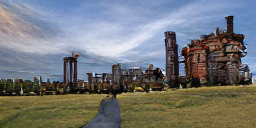

  0%|          | 0/1000 [00:00<?, ?it/s]

/home/dmarx/.local/share/virtualenvs/pytti-book-l72HEyWC/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


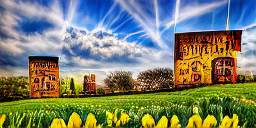

  0%|          | 0/1000 [00:00<?, ?it/s]

In [2]:
%%time 
#exp_limited_palette.run_all()
exp_vqgan_base_perceptors.run_all()